# Clusterizacao - Case ImdbMovies
## Equipe RF System
## Caio Navarro, Gustavo Jordão, Isabellí Andrade, Rafael Salles e Rafael Silva.


# Import das bibliotecas

# Web Scraping / Crawler

In [10]:
userAgents=[
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"]

url = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
response = requests.get(url, headers={"User-agent": userAgents[1]})
response

<Response [200]>

In [97]:
userAgents=[
    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/74.0.3729.157 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15"]

url = 'https://www.imdb.com/chart/moviemeter/?ref_=chttvtp_ql_2'
response = requests.get(url, headers={"User-agent": userAgents[1]})
response


<Response [200]>

In [98]:
html = response.text
html

'<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === \'function\'){ uet(\'bb\', \'LoadTitle\', {wb: 1}); }</script><script>window.addEventListener(\'load\', (event) => {\n        if (typeof window.csa !== \'undefined\' && typeof window.csa === \'function\') {\n            var csaLatencyPlugin = window.csa(\'Content\', {\n                element: {\n                    slotId: \'LoadTitle\',\n                    type: \'service-call\'\n                }\n            });\n            csaLatencyPlugin(\'mark\', \'clickToBodyBegin\', 1695000741700);\n        }\n    })</script><title>Most Popular Movies</title><meta name="description" content="As determined by IMDb Users" data-id="main"/><meta property="og:site_name" content="IMDb"/><meta property="og:title" content="Most Popular Movies"/><meta property="og:desc

In [99]:
#BeautifulSoup
bs = BeautifulSoup(html)
pprint(bs)


<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1695000741700);
        }
    })</script><title>Most Popular Movies</title><meta content="As determined by IMDb Users" data-id="main" name="description"/><meta content="IMDb" property="og:site_name"/><meta content="Most Popular Movies" property="og:title"/><meta content="As determined by IMDb Users" property="o

## Title EN

In [100]:
titles = bs.find_all('h3', attrs={'class': 'ipc-title__text'})
titles

[<h3 class="ipc-title__text">IMDb Charts</h3>,
 <h3 class="ipc-title__text">Oppenheimer</h3>,
 <h3 class="ipc-title__text">Barbie</h3>,
 <h3 class="ipc-title__text">You Are So Not Invited to My Bat Mitzvah</h3>,
 <h3 class="ipc-title__text">The Equalizer 3</h3>,
 <h3 class="ipc-title__text">The Little Mermaid</h3>,
 <h3 class="ipc-title__text">Poor Things</h3>,
 <h3 class="ipc-title__text">The Nun II</h3>,
 <h3 class="ipc-title__text">Jawan</h3>,
 <h3 class="ipc-title__text">Teenage Mutant Ninja Turtles: Mutant Mayhem</h3>,
 <h3 class="ipc-title__text">Indiana Jones and the Dial of Destiny</h3>,
 <h3 class="ipc-title__text">No Hard Feelings</h3>,
 <h3 class="ipc-title__text">The Bikeriders</h3>,
 <h3 class="ipc-title__text">The Last Voyage of the Demeter</h3>,
 <h3 class="ipc-title__text">The Flash</h3>,
 <h3 class="ipc-title__text">Doggy Style</h3>,
 <h3 class="ipc-title__text">Bottoms</h3>,
 <h3 class="ipc-title__text">A Haunting in Venice</h3>,
 <h3 class="ipc-title__text">Sound of 

In [101]:
list_title_en = []
for x in titles[1:-12]:
  tit = (x.text).split(">")[0].strip()
  list_title_en.append(tit)

display(len(list_title_en))
list_title_en[:5]

100

['Oppenheimer',
 'Barbie',
 'You Are So Not Invited to My Bat Mitzvah',
 'The Equalizer 3',
 'The Little Mermaid']

## Year

In [102]:
list_years = []
years = bs.find_all('div', attrs={'class':'sc-14dd939d-5 cPiUKY cli-title-metadata'})
for y in years:
  year = y.find('span', attrs={'class':'sc-14dd939d-6 kHVqMR cli-title-metadata-item'}).text
  list_years.append(year)
display(len(list_years))
list_years[:5]

0

[]

## Rating

In [103]:
ratings = bs.find_all('div', attrs={'class':'sc-951b09b2-0 hDQwjv sc-14dd939d-2 fKPTOp cli-ratings-container'})
list_rating = []
for r in ratings:
  rating = r.find('span').text
  list_rating.append(rating)

display(len(list_rating))
pprint(list_rating[:5])

0

[]


## Genre, Title PT & Year

In [104]:
list_links = []
for a in bs.find_all('a', href=True):
  if '/title/' in a['href'] and 'https://www.imdb.com/'+ a['href'] not in list_links:
    list_links.append(('https://www.imdb.com/'+a['href'])[:-15])

#Remove duplicates
list_links = list(dict.fromkeys(list_links))
#Deleting first element
list_links = list_links[1:]

display(len(list_links))
list_links[:5]

100

['https://www.imdb.com//title/tt15398776/?',
 'https://www.imdb.com//title/tt1517268/?',
 'https://www.imdb.com//title/tt21276878/?',
 'https://www.imdb.com//title/tt17024450/?',
 'https://www.imdb.com//title/tt5971474/?']

In [ ]:
headers = {
          'authority': 'www.amazon.com.br',
          'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
          'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
          'cache-control': 'max-age=0',
          'device-memory': '8',
          'downlink': '10',
          'dpr': '1.875',
          'ect': '4g',
          'rtt': '50',
          'sec-ch-device-memory': '8',
          'sec-ch-dpr': '1.875',
          'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
          'sec-ch-ua-mobile': '?0',
          'sec-ch-ua-platform': '"Windows"',
          'sec-ch-ua-platform-version': '"10.0.0"',
          'sec-ch-viewport-width': '455',
          'sec-fetch-dest': 'document',
          'sec-fetch-mode': 'navigate',
          'sec-fetch-site': 'none',
          'sec-fetch-user': '?1',
          'upgrade-insecure-requests': '1',
          'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
          'viewport-width': '455',
          }
############################################################
list_genre = []
list_title_pt = []
list_year = []
list_sinopse = []

for link in list_links:
  time.sleep(.5)
  response = requests.get(link, headers = headers)
  html = response.content
  soup = BeautifulSoup(html, "html.parser")

  #genre
  try:
    for genre in soup.find('span', {'class':'ipc-chip__text'}):
      genre = genre.text
      list_genre.append(genre)
  except:
      list_genre.append(np.nan)
      print('Nan')

  #title_PT and year
  try:
    for x in soup.find('title'):
      #title_pt
      title_pt = (x.text)[:-14].strip()
      list_title_pt.append(title_pt)
      #year
      year = (x.text)[-12:-8].strip()
      list_year.append(year)

  except:
    list_title_pt.append(np.nan)
    list_year.append(np.nan)

  #sinopse
  try:
    for sin in soup.find('span', {"data-testid":"plot-xl"}):
      sinopse = sin.text
      list_sinopse.append(sinopse)
  except:
    list_sinopse.append(np.nan)

  print(genre, title_pt, year, sinopse[:20])

display(len(list_genre), len(list_title_pt), len(list_year), len(list_sinopse))
print(list_genre[:5])
print(list_title_pt[:5])
print(list_year[:5])
display(list_sinopse[:2])

## DataFrame

In [114]:
from google.colab import drive
drive.mount('/content/drive0', force_remount=True)

Mounted at /content/drive0


In [118]:
a = {'title_pt' : list_title_pt ,'year' : list_year , 'genre': list_genre , 'sinopse':list_sinopse}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()

In [119]:
# #completar
# df = pd.DataFrame({'title_pt':list_title_pt,
#                   'year':list_year,
#                    'genre':list_genre,
#                    'sinopse':list_sinopse})
# display(df.head())

In [120]:
df.count()

title_pt    100
year        100
genre       100
sinopse     103
dtype: int64

# Export df to csv

In [121]:
from datetime import datetime
today = datetime.today().strftime('%Y%m%d')
today

'20230918'

In [124]:
path_to_export = '/content/drive0/MyDrive/Automated_ML_and_Deploy Aula_20230818_Clusterizacao_Exercicio_Pratico_ImdbMovies_Parte2'
df.to_csv(f'{path_to_export}/top250_movies_{today}.csv', sep = ';',index = False)

# Merge with historical data

In [125]:
#Merge with historical data
from glob import glob

#loading MES
list_files = []
for file in glob(path_to_export + '/*.csv'):
    list_files.append(file)

#appending each tag file in a list
list_df = []
c = 0
for file in list_files:
    print(f'{c+1} of {len(list_files)} | {file}')
    df_temp = pd.read_csv(  file, sep = ';')
    list_df.append(df_temp)
    c += 1

#mergin all files
df_historical = pd.concat(list_df, axis = 0, copy = False)
df_historical = df_historical.drop_duplicates(subset=['title_pt'], keep = 'last')
df_historical = df_historical.reset_index(drop = True)
display(df_historical.shape)
display(df_historical)

1 of 2 | /content/drive0/MyDrive/Automated_ML_and_Deploy Aula_20230818_Clusterizacao_Exercicio_Pratico_ImdbMovies_Parte2/top250_movies_20230918.csv
2 of 2 | /content/drive0/MyDrive/Automated_ML_and_Deploy Aula_20230818_Clusterizacao_Exercicio_Pratico_ImdbMovies_Parte2/all_movies.csv


(339, 4)

title_pt    year     genre  \
0                                       Barbie  2023.0  Aventura   
1    Você Não Tá Convidada pro Meu Bat Mitzvá!  2023.0   Comédia   
2                   O Protetor: Capítulo Final  2023.0      Ação   
3                             A Pequena Sereia  2023.0  Aventura   
4                             Pobres Criaturas  2023.0   Romance   
..                                         ...     ...       ...   
334                      Um Sonho de Liberdade  1994.0     Drama   
335                          O Poderoso Chefão  1972.0  Policial   
336             Batman: O Cavaleiro das Trevas  2008.0      Ação   
337                       O Poderoso Chefão II  1974.0  Policial   
338                   12 Homens e uma Sentença  1957.0  Policial   

                                               sinopse  
0    Viver na Terra da Barbie é ser um ser perfeito...  
1    Stacey Friedman se prepara para seu bat mitzva...  
2    Robert McCall se sente em casa no sul da Itáli...  
3    A filha do rei Tritão, Ariel, se apaixona louc...  
4    A incrível história sobre a evolução fantástic...  
..                                                 ...  
334  Dois homens presos se reúnem ao longo de vário...  
335  O patriarca idoso de uma dinastia do crime org...  
336  Batman enfrenta o Coringa em uma batalha épica...  
337  Michael Corleone expande império do crime enqu...  
338  Jurados debatem veredito de homicídio em um ca...  

[339 rows x 4 columns]

# Export historical data

In [126]:
df_historical.to_csv(f'{path_to_export}/all_movies.csv', sep = ';',index = False)

#EDA - Exploratory Data Analysis

In [127]:
df = pd.read_csv(f'{path_to_export}/all_movies.csv', sep = ';')

print(df.shape)
df.head()

(339, 4)


title_pt    year     genre  \
0                                     Barbie  2023.0  Aventura   
1  Você Não Tá Convidada pro Meu Bat Mitzvá!  2023.0   Comédia   
2                 O Protetor: Capítulo Final  2023.0      Ação   
3                           A Pequena Sereia  2023.0  Aventura   
4                           Pobres Criaturas  2023.0   Romance   

                                             sinopse  
0  Viver na Terra da Barbie é ser um ser perfeito...  
1  Stacey Friedman se prepara para seu bat mitzva...  
2  Robert McCall se sente em casa no sul da Itáli...  
3  A filha do rei Tritão, Ariel, se apaixona louc...  
4  A incrível história sobre a evolução fantástic...

In [151]:
df = df.dropna()

In [152]:
# Adjusting variable types
df['year'] = df['year'].astype('int64')
#df['rating'] = df['rating'].astype('float64')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 338
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title_pt  337 non-null    object
 1   year      337 non-null    int64 
 2   genre     337 non-null    object
 3   sinopse   337 non-null    object
dtypes: int64(1), object(3)
memory usage: 13.2+ KB


In [154]:
df.describe()

year
count   337.000000
mean   1995.821958
std      26.766145
min    1921.000000
25%    1980.000000
50%    2003.000000
75%    2020.000000
max    2023.000000

## Plots

In [155]:
df.genre.value_counts('d')

Ação          0.225519
Drama         0.225519
Comédia       0.121662
Policial      0.115727
Animação      0.086053
Biografia     0.080119
Aventura      0.074184
Terror        0.047478
Mistério      0.011869
Romance       0.002967
Fantasia      0.002967
Faroeste      0.002967
Filme noir    0.002967
Name: genre, dtype: float64

In [156]:
fig = px.bar(df.genre.value_counts('d')*100,
             text_auto=True,
             title = '% de Filmes por Gênero',
             labels={'index':'Gênero',
                     'value':'% de Filmes'})
fig.show()

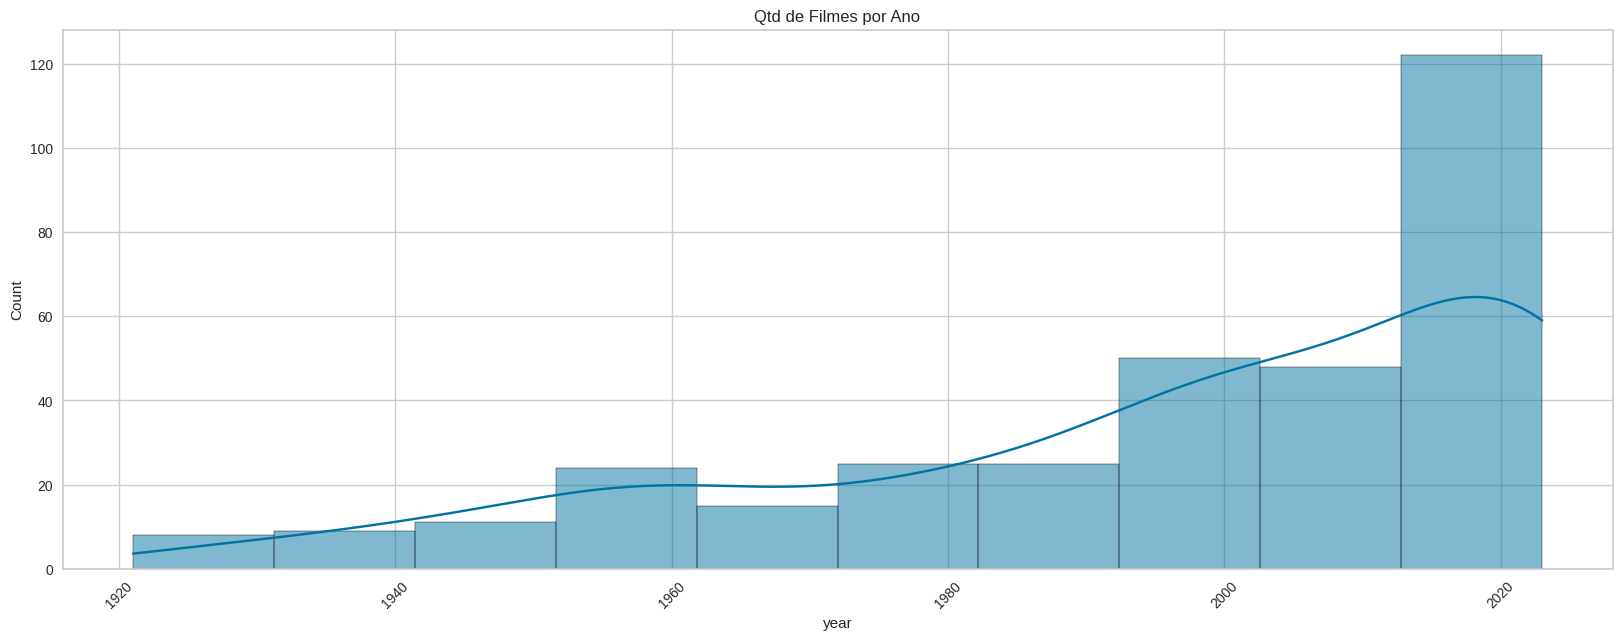

In [157]:
plt.figure(figsize = (20,7))
sns.histplot( df,
              x = 'year',
              kde = True).set_title('Qtd de Filmes por Ano')
plt.xticks(rotation=45)
plt.show()

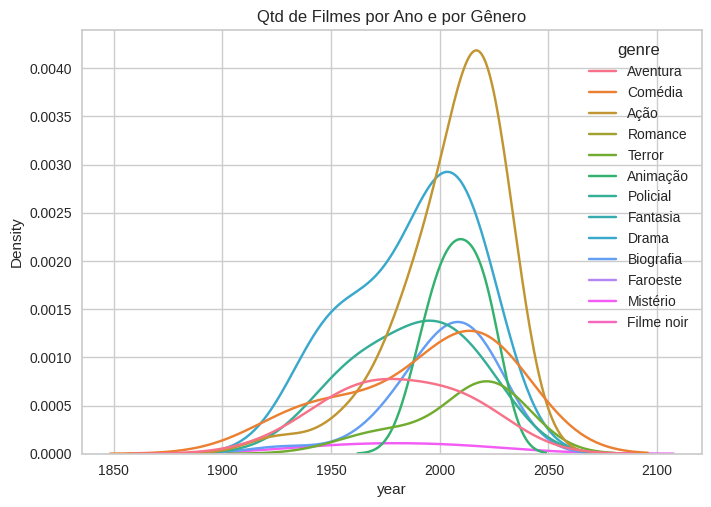

In [158]:
sns.kdeplot( df, x = 'year', hue = 'genre', bw_adjust = 1.5, warn_singular = False).set_title('Qtd de Filmes por Ano e por Gênero')
plt.show()

# Pré-processamento de texto

In [159]:
#convert sinopses to lowercase
df_processed = df.copy()
df_processed['sinopse'] = df_processed['sinopse'].str.lower()
df_processed['sinopse'].head()

0    viver na terra da barbie é ser um ser perfeito...
1    stacey friedman se prepara para seu bat mitzva...
2    robert mccall se sente em casa no sul da itáli...
3    a filha do rei tritão, ariel, se apaixona louc...
4    a incrível história sobre a evolução fantástic...
Name: sinopse, dtype: object

In [160]:
def qty_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [161]:
### Feature Engineering
df_processed['word_count'] = df_processed['sinopse'].apply(qty_words).astype('int64')
df_processed.head()

title_pt  year     genre  \
0                                     Barbie  2023  Aventura   
1  Você Não Tá Convidada pro Meu Bat Mitzvá!  2023   Comédia   
2                 O Protetor: Capítulo Final  2023      Ação   
3                           A Pequena Sereia  2023  Aventura   
4                           Pobres Criaturas  2023   Romance   

                                             sinopse  word_count  
0  viver na terra da barbie é ser um ser perfeito...          29  
1  stacey friedman se prepara para seu bat mitzva...          19  
2  robert mccall se sente em casa no sul da itáli...          43  
3  a filha do rei tritão, ariel, se apaixona louc...          32  
4  a incrível história sobre a evolução fantástic...          26

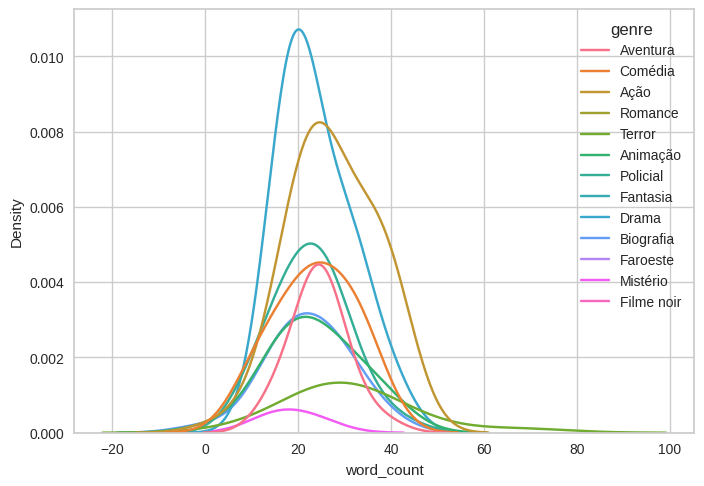

In [162]:
sns.kdeplot( df_processed, x = 'word_count', hue = 'genre', bw_adjust = 1.5, warn_singular = False)
plt.show()

## Nuvem de palavras

### Antes de remover as stopwords

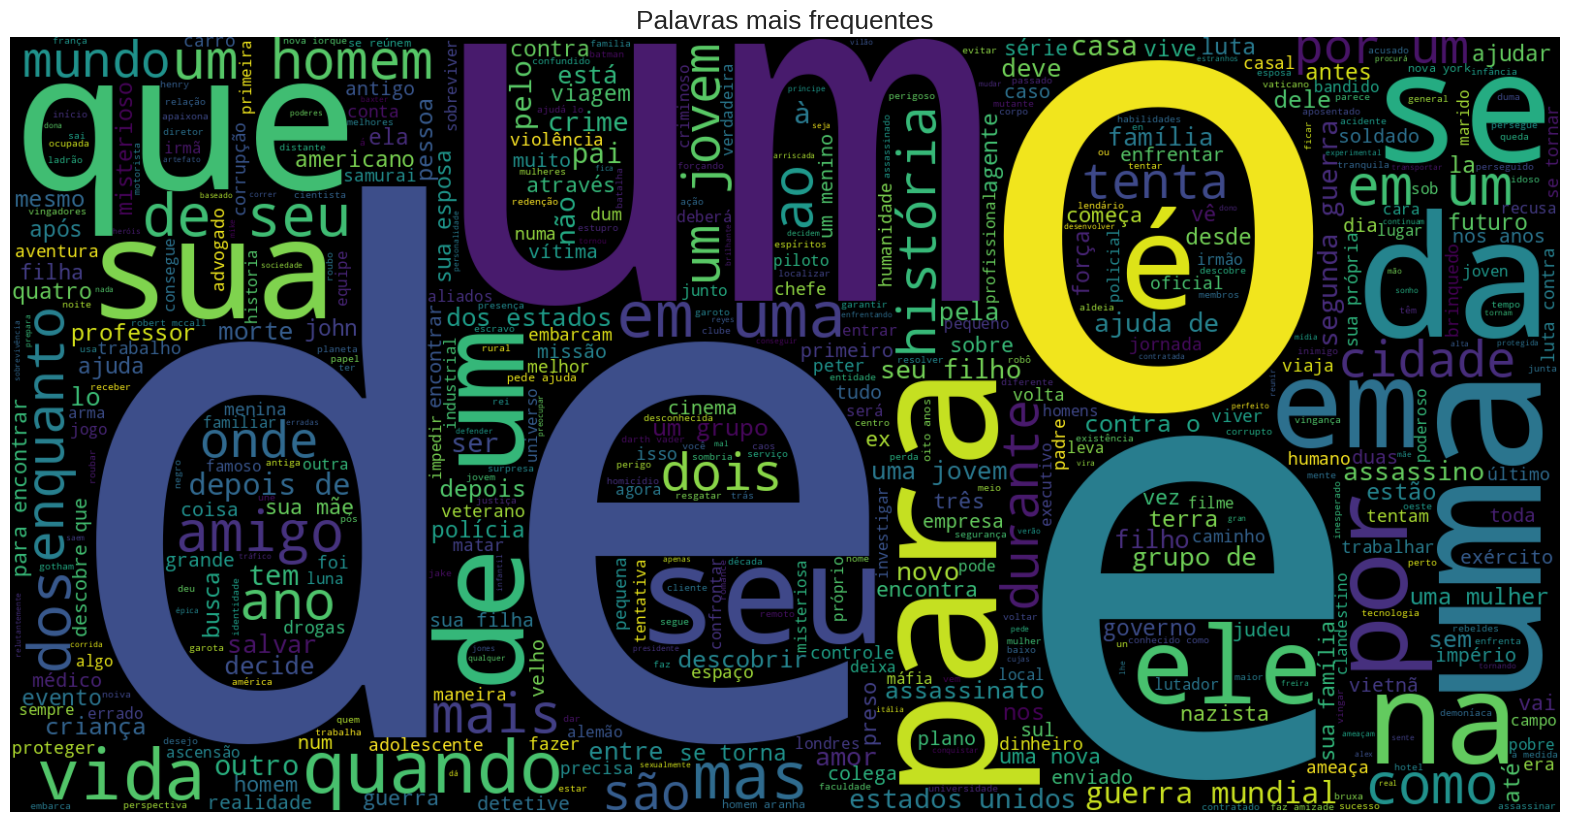

In [163]:
text = ' '.join([phrase for phrase in df_processed['sinopse']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes', fontsize = 19)
plt.show()

### Após remoção das stopwords

In [164]:
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


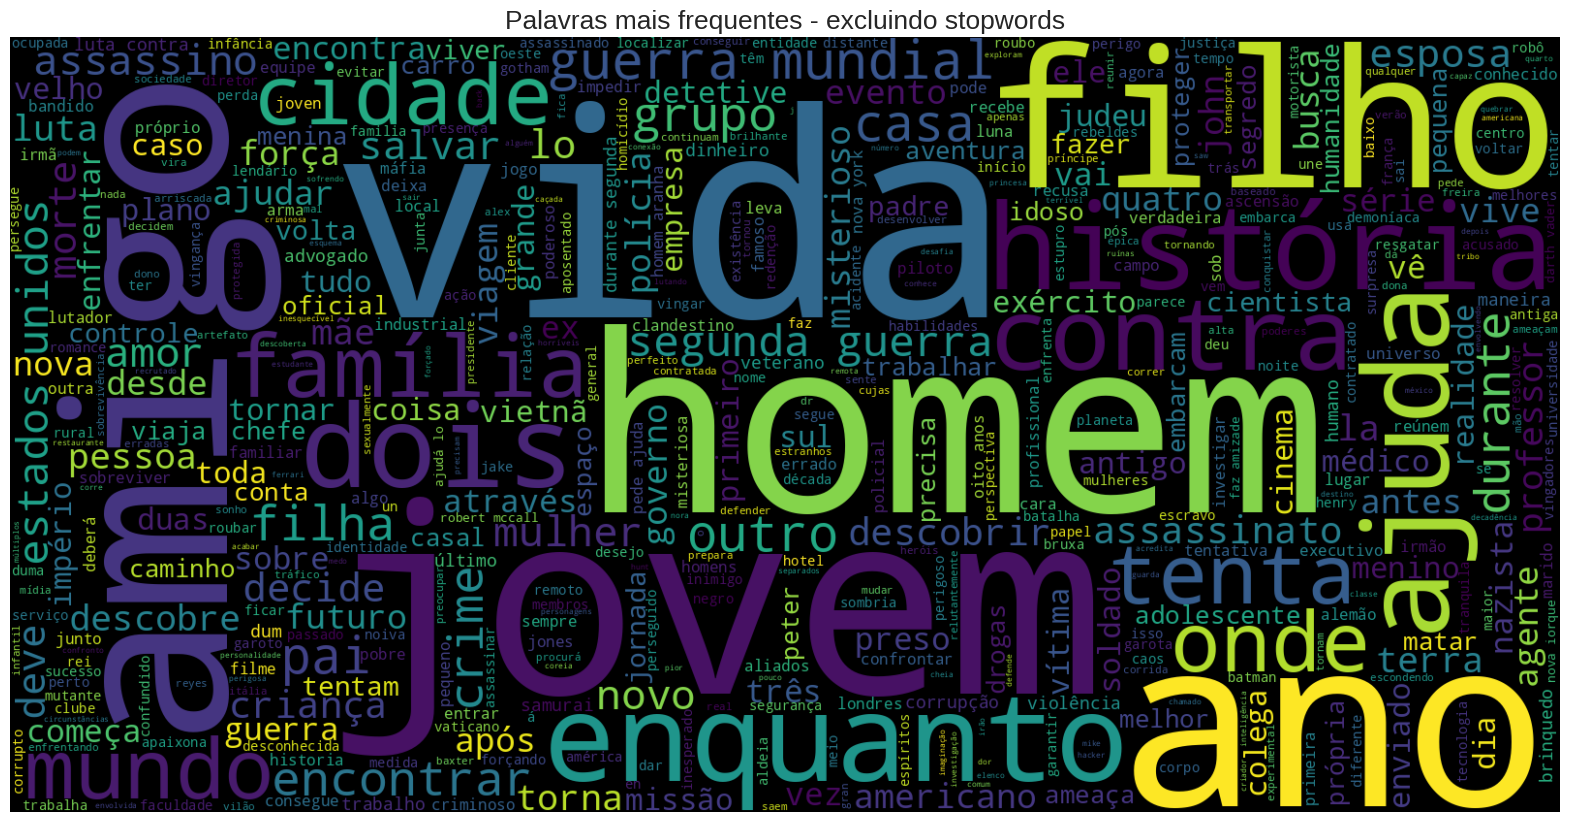

In [165]:
df_processed['sinopse_no_stopwords'] = df_processed['sinopse'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
text = ' '.join([phrase for phrase in df_processed['sinopse_no_stopwords']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palavras mais frequentes - excluindo stopwords', fontsize = 19)
plt.show()

## Aplicando TF-IDF
Term Frequency-Inverse Document Frequency

O TF-IDF define a importância de um termo levando em consideração a importância desse termo em um único documento e dimensionando-o por sua importância em todos os documentos.

In [166]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df_processed['sinopse_no_stopwords'])

In [167]:
print(X.shape)
X.toarray()

(337, 132)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# KMeans - Clusterização

## Escolhendo o numero de "k" clusters ideal

### Método Elbow

2 306.6628476627703
3 301.1627936723278


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



4 294.78285847805455
5 290.8501336869656
6 287.7877875213567
7 282.25724173707727
8 278.3403838858357
9 275.59481022480315
10 273.50817164217557
11 271.11951688340923
12 269.68821745084387
13 260.0218163653089


Text(0, 0.5, 'WCSS')

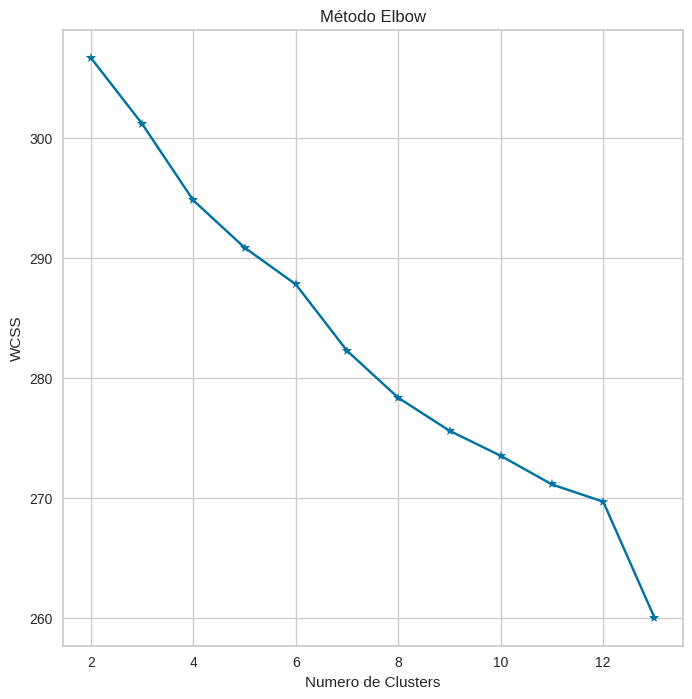

In [168]:
plt.figure(figsize = (8,8))

#plotando o grafico do método elbow
wcss = []

for i in range(2, df_processed.genre.nunique()+1):
  kmeans = KMeans(n_clusters = i, init = 'random')
  kmeans.fit(X)
  print(i, kmeans.inertia_)
  wcss.append(kmeans.inertia_)

plt.plot(range(2, df_processed.genre.nunique()+1), wcss, '*-')
plt.title('Método Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS') #within cluster sum of square


### Método Silhouette

IndexError: ignored

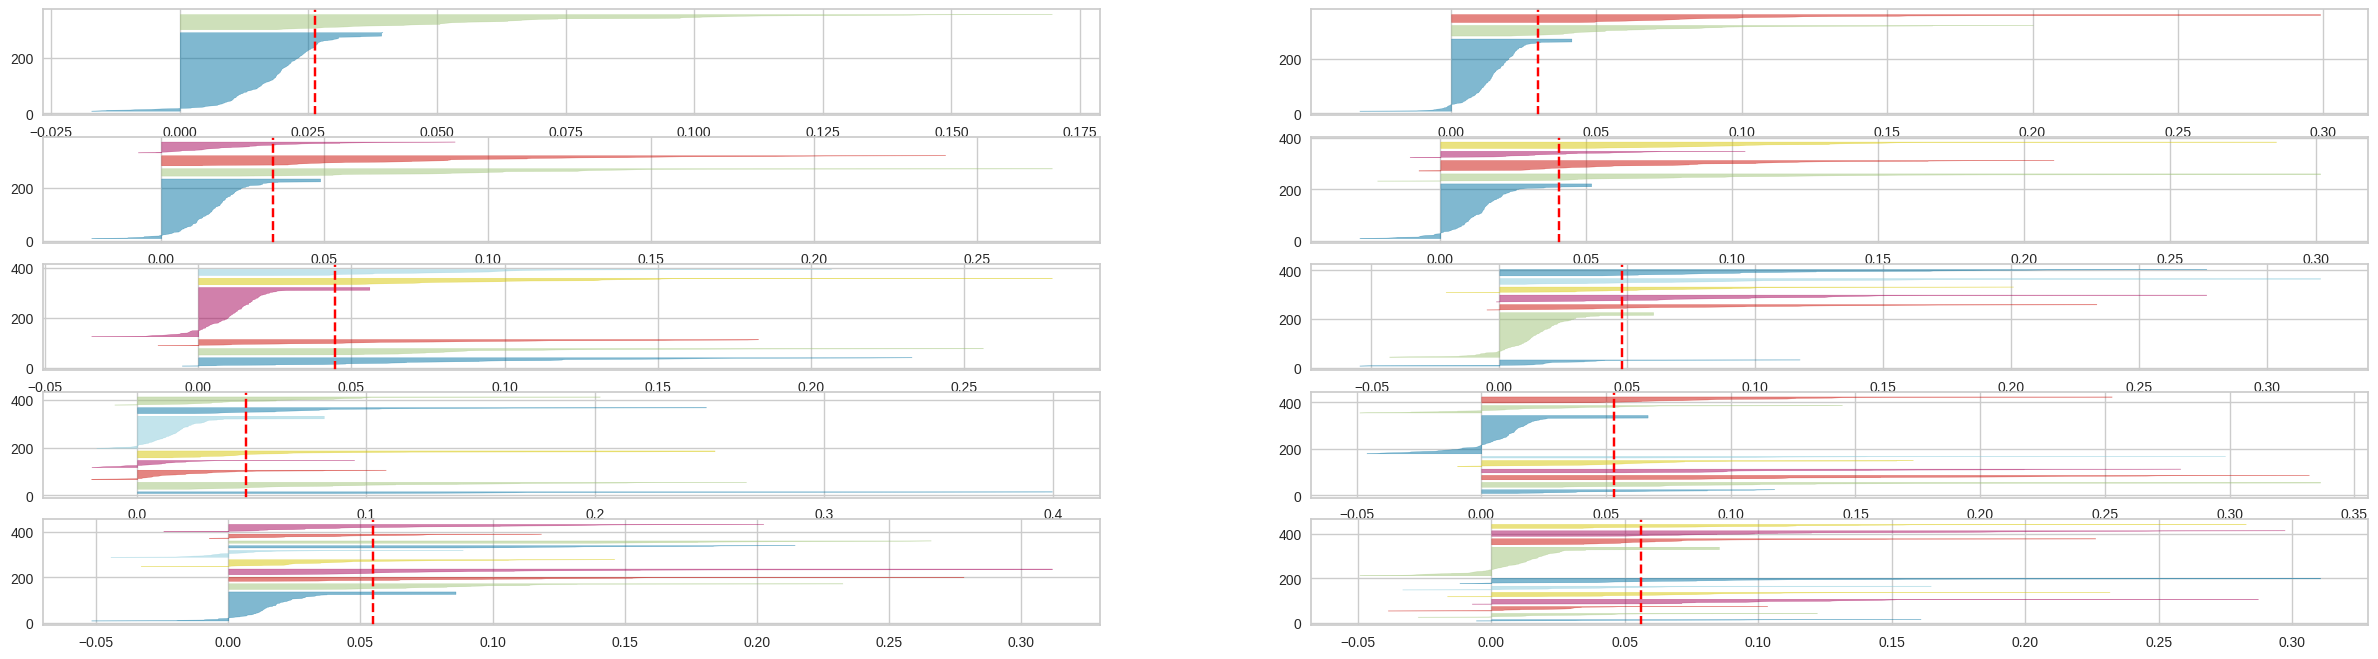

In [170]:
fig, ax = plt.subplots(5,2, figsize = (30,8))
for i in (range(2, df_processed.genre.nunique()+1)):
  #Creating KMeans instance for different number of clusters
  kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 30, max_iter = 300, random_state = 45)
  q, mod = divmod(i,2)

  #Creating SilhouetteVisualizer instance with KMeans instance
  #Fit the visualizer

  visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(X)

### Análise do número de clusters | k = 5
* Tanto ambos métodos não mostraram claramente o numero ideal de clusters, provavelmente em função do numero reduzido de amostras existentes no dataset (250). Para fins didáticos será assumido o numero de k = 5.

# Comparativo entre os 5 clusters

In [171]:
# initialize kmeans with 5 centroids
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans = kmeans.fit(X)
#predicting the clusters and store cluster labels in a variable
labels = kmeans.predict(X)
#getting the cluster centers
c = kmeans.cluster_centers_

df_processed['cluster'] = labels
df_processed.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



title_pt  year     genre  \
0                                     Barbie  2023  Aventura   
1  Você Não Tá Convidada pro Meu Bat Mitzvá!  2023   Comédia   
2                 O Protetor: Capítulo Final  2023      Ação   
3                           A Pequena Sereia  2023  Aventura   
4                           Pobres Criaturas  2023   Romance   

                                             sinopse  word_count  \
0  viver na terra da barbie é ser um ser perfeito...          29   
1  stacey friedman se prepara para seu bat mitzva...          19   
2  robert mccall se sente em casa no sul da itáli...          43   
3  a filha do rei tritão, ariel, se apaixona louc...          32   
4  a incrível história sobre a evolução fantástic...          26   

                                sinopse_no_stopwords  cluster  
0  viver terra barbie perfeito lugar perfeito. me...        2  
1  stacey friedman prepara bat mitzvah, planos de...        2  
2  robert mccall sente casa sul itália, descobre ...        2  
3  filha rei tritão, ariel, apaixona loucamente p...        2  
4  incrível história sobre evolução fantástica be...        4

## Filmes por cluster

In [172]:
fig = px.bar(df_processed.cluster.value_counts(),
             text_auto = True,
             title = 'Qtd de Filmes por Cluster',
             labels = {'index': 'Cluster #',
                       'value':'Qtd. de Filmes'})
fig.show()

## % de Gêneros por Cluster

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3201: UserWarning:

Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.



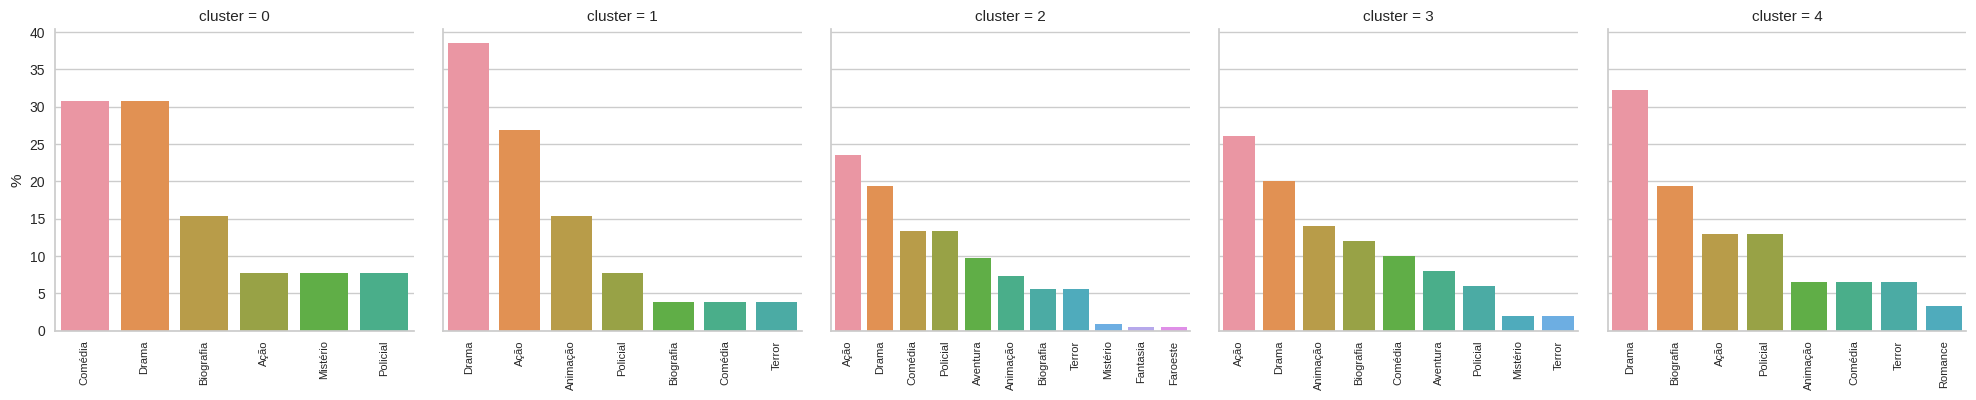

In [173]:
df_plot = df_processed.groupby(['cluster', 'genre'])['title_pt'].count()
df_plot = df_plot.reset_index()
df_plot.rename(columns = {'title_pt':'count'}, inplace = True)
df_plot['%'] = 100 * df_plot['count'] / df_plot.groupby('cluster')['count'].transform('sum')
df_plot = df_plot.sort_values(['cluster', '%'], ascending = False).groupby('cluster').head(11)

fig = sns.catplot(
    data=df_plot, x="genre", y = "%", col="cluster",
    kind="bar", height=4, aspect=1, sharex = False);
fig.set_xlabels('');
fig.set_xticklabels(rotation=90, size = 8);

## Ano de Lançamento por Cluster

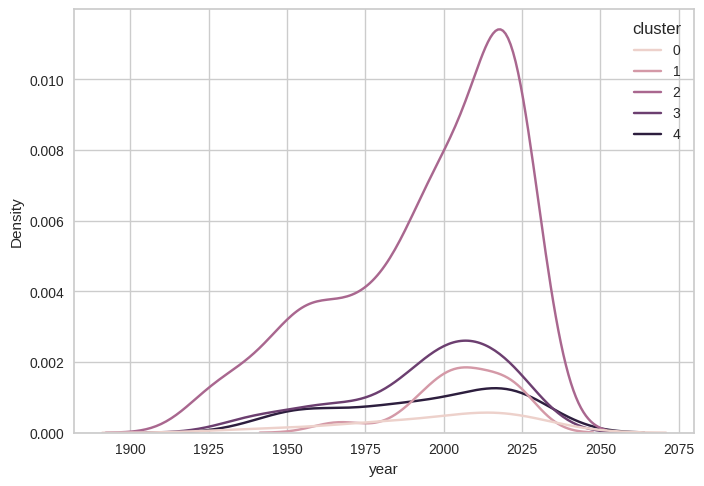

In [174]:
sns.kdeplot(df_processed, x = 'year', hue = 'cluster');

## Radar | Gêneros por Cluster

In [175]:
df_pivot = df_plot.copy()
df_pivot = df_pivot.pivot(index = 'cluster', columns = 'genre', values = '%')
df_pivot.fillna(0, inplace = True)
df_pivot = df_pivot.T.reset_index()
df_pivot.index.name = None
df_pivot

cluster      genre          0          1          2     3          4
0         Animação   0.000000  15.384615   7.373272  14.0   6.451613
1         Aventura   0.000000   0.000000   9.677419   8.0   0.000000
2             Ação   7.692308  26.923077  23.502304  26.0  12.903226
3        Biografia  15.384615   3.846154   5.529954  12.0  19.354839
4          Comédia  30.769231   3.846154  13.364055  10.0   6.451613
5            Drama  30.769231  38.461538  19.354839  20.0  32.258065
6         Fantasia   0.000000   0.000000   0.460829   0.0   0.000000
7         Faroeste   0.000000   0.000000   0.460829   0.0   0.000000
8         Mistério   7.692308   0.000000   0.921659   2.0   0.000000
9         Policial   7.692308   7.692308  13.364055   6.0  12.903226
10         Romance   0.000000   0.000000   0.000000   0.0   3.225806
11          Terror   0.000000   3.846154   5.529954   2.0   6.451613

In [176]:
df_polar = df_pivot.melt(id_vars=['genre'])
df_polar.head()

genre cluster      value
0   Animação       0   0.000000
1   Aventura       0   0.000000
2       Ação       0   7.692308
3  Biografia       0  15.384615
4    Comédia       0  30.769231

In [177]:
fig = px.line_polar(df_polar, r='value', theta='genre', color = 'cluster', line_close=True)
fig.show();

# Nuvem de Palavras por Cluster

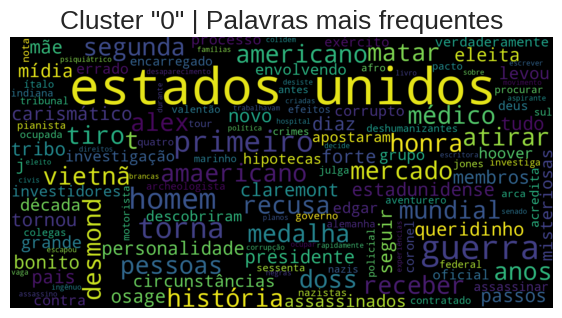

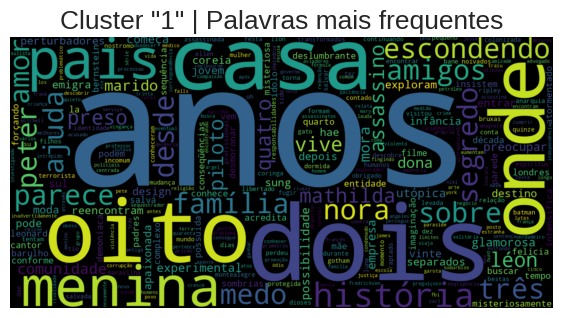

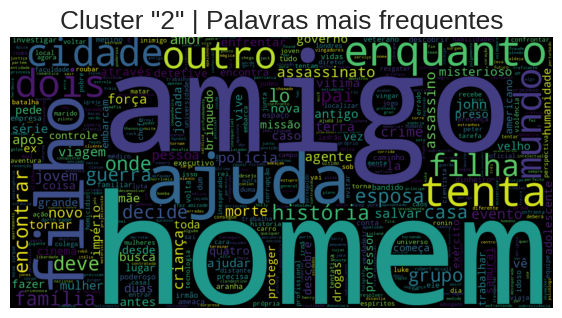

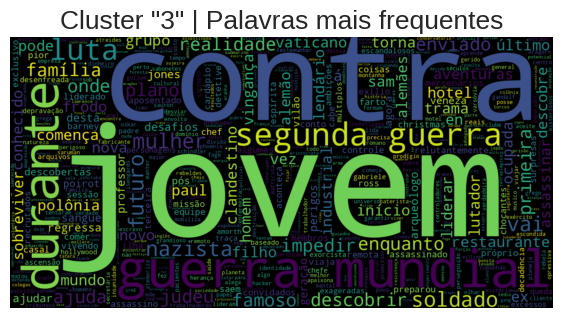

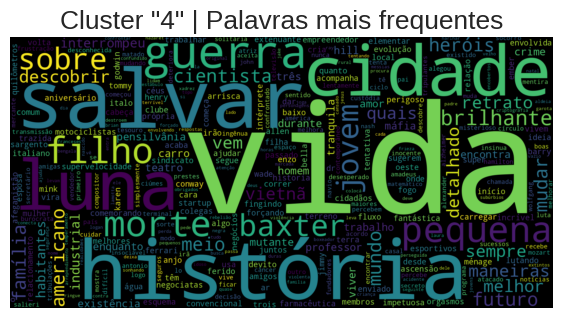

In [178]:
def word_cloud_cluster(cluster:int):
  text = ' '.join([phrase for phrase in df_processed.loc[df_processed.cluster == cluster]['sinopse_no_stopwords']])
  plt.figure(figsize=(7,5), facecolor='None')
  wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Cluster "{cluster}" | Palavras mais frequentes', fontsize = 19)
  plt.show()
  return

for c in range(5):
  word_cloud_cluster(c)

# Considerações Finais
* **Exercício: Reescrever as análises / conclusões devido a atualização da base**

Nessa segunda parte foi usado o top 100 melhores filmes.
A inciiativa foi paar entender como o modelo se comportaria com a clusterização no caso de não ter
aleatoriedade ja que já sabiamos o top 1 do site.

E como o filme mais votado é Oppenheimer o cluster 0 ficou com a melhor distruibuição e na nuvem de
palavras é o que melhor sugere ao filme, já que as palavras chaves são: estados unidos, historia, americano, assassinados...
Foi um cluster com bastante palavras e quase todas no mesmo tamanho.

No gráfico polar, evidenciamos que o cluster 0 variou um pouco em cómedia, o que explicaria o 2° lugar da lista: Barbie, que oscila
entre drama e comédia.
O cluster 4 se mostrou com amostrar significativas no gênero "Biografia" e "policial".

Por fim, as distribuições dos cluster ficaram bem parecidas entre si. Etretanto, os cluster 2,3 e 4 possuem mais gêneros que os cluster 0 e 1.
E como analisado acima, o gênero com maior destaque é drama, e o segundo, comédia.

Obrigada prof!